In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.decomposition import PCA

In [2]:
n = 1000
n1 = 400
n2 = 600

x1 = np.zeros((n))
np.random.seed(121123)
x1[:n1] = np.random.normal(loc=-1, scale=0.5, size=n1)
x1[n1:] =  np.random.normal(loc=1, scale=0.5, size=n2)

x2 = 0.4 * x1 + 0.4 * np.random.normal(loc=0, scale=1, size=n)

x = np.vstack((x1, x2))

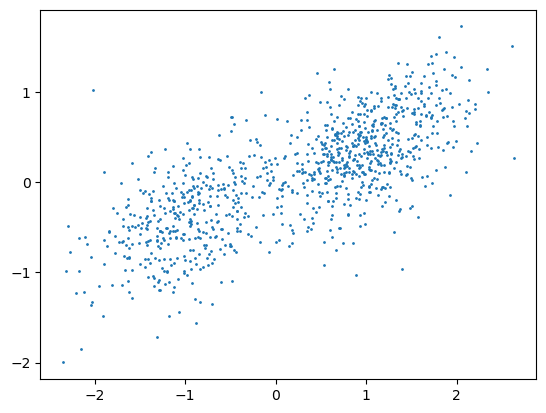

In [3]:
plt.plot(x1, x2, 'o', ms=1)
_ = plt.xticks(range(-2, 3))
_ = plt.yticks(range(-2, 2))

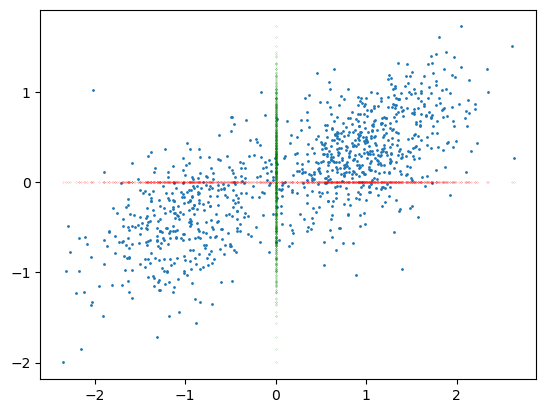

In [4]:
plt.plot(x1, x2, 'o', ms=1)
plt.plot(x1, np.repeat(0, n), 'o', ms=0.1, color='red')
plt.plot(np.repeat(0, n), x2, 'o', ms=0.1, color='green')
_ = plt.xticks(range(-2, 3))
_ = plt.yticks(range(-2, 2))

Text(0, 0.5, 'Freq')

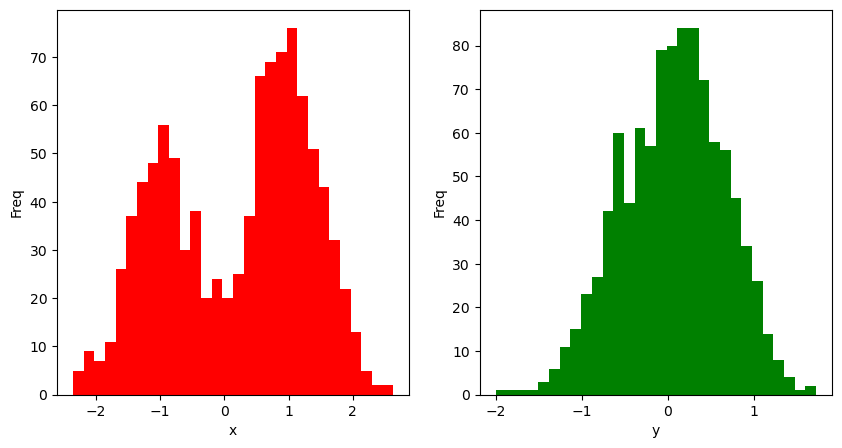

In [5]:
ax = plt.subplots(1, 2, figsize=(10, 5))[1]
ax[0].hist(x1, bins=30, color='red')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Freq')
ax[1].hist(x2, bins=30, color='green')
ax[1].set_xlabel('y')
ax[1].set_ylabel('Freq')

In [6]:
np.var(x1)

1.2299987197466375

In [7]:
np.var(x2)

0.3525515017824183

In [8]:
v = np.linalg.eig(np.cov(x)).eigenvectors
v1 = v[:, 0]
v2 = v[:, 1]

In [9]:
np.var(np.dot(v1, x))

1.4484793767157276

In [10]:
np.var(np.dot(v2, x))

0.1340708448133282

In [11]:
alpha1 = v1.reshape(2, 1) * np.dot(v1, x).reshape(1, n)
alpha2 = v2.reshape(2, 1) * np.dot(v2, x).reshape(1, n)

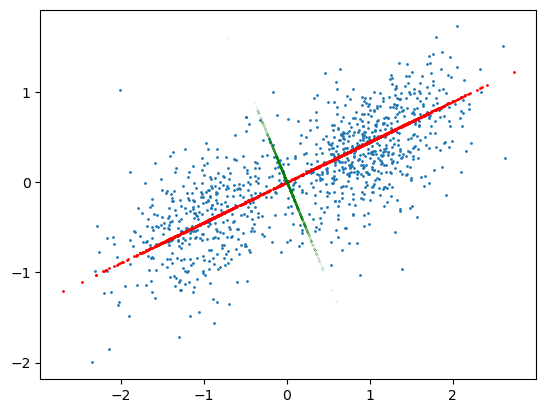

In [12]:
plt.plot(x1, x2, 'o', ms=1)
plt.plot(alpha1[0, :], alpha1[1, :], 'o', ms=1, color='red')
plt.plot(alpha2[0, :], alpha2[1, :], 'o', ms=0.1, color='green')
_ = plt.xticks(range(-2, 3))
_ = plt.yticks(range(-2, 2))

Text(0, 0.5, 'Freq')

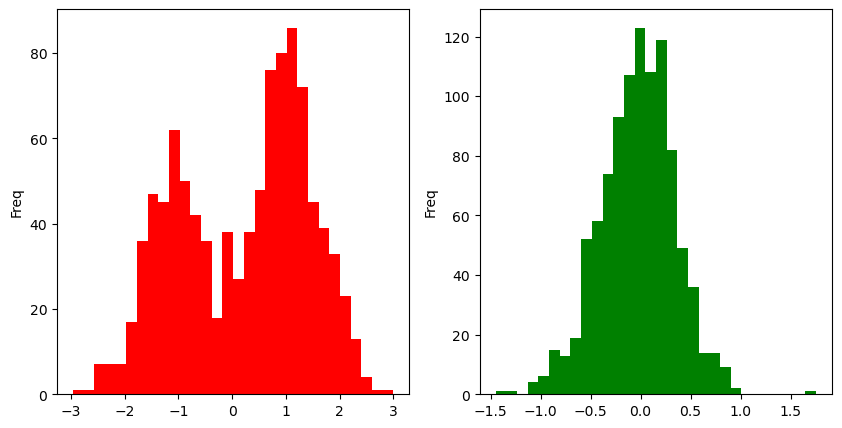

In [13]:
ax = plt.subplots(1, 2, figsize=(10, 5))[1]
ax[0].hist(np.dot(v1, x), bins=30, color='red')
ax[0].set_ylabel('Freq')
ax[1].hist(np.dot(v2, x), bins=30, color='green')
ax[1].set_ylabel('Freq')

In [14]:
# Hitters data
df = pd.read_csv('Hitters.csv').dropna()
X = df[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks']]

X = ((X - X.mean()) / X.std())

In [15]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.55472581 0.29377406]


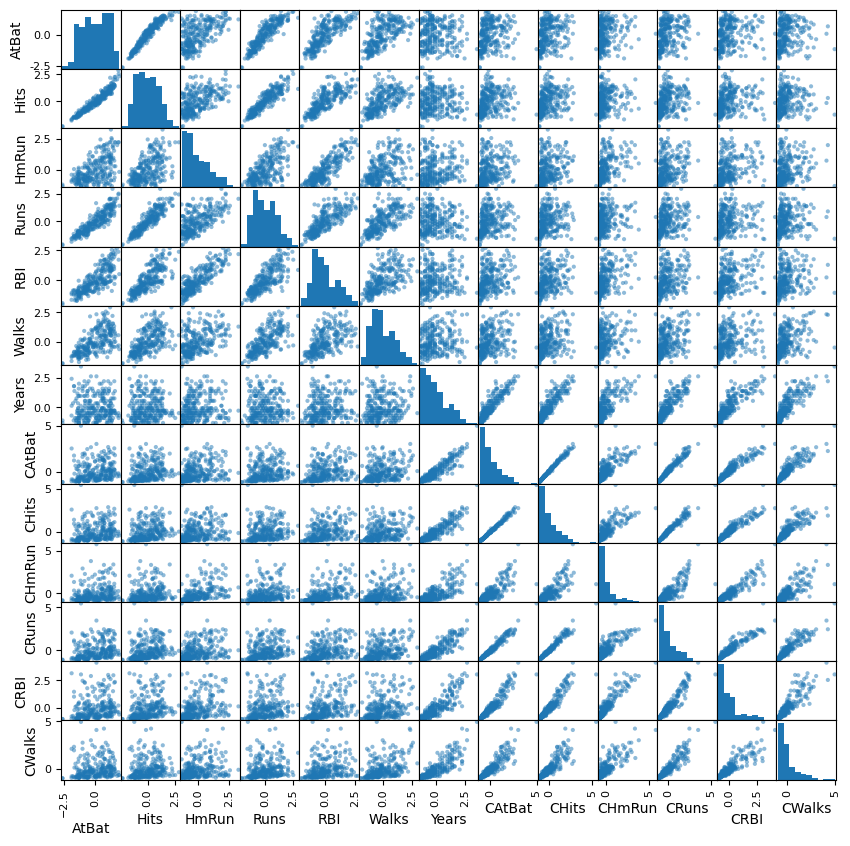

In [16]:
p = pd.plotting.scatter_matrix(X, figsize=(10, 10))

Text(0, 0.5, 'PC2')

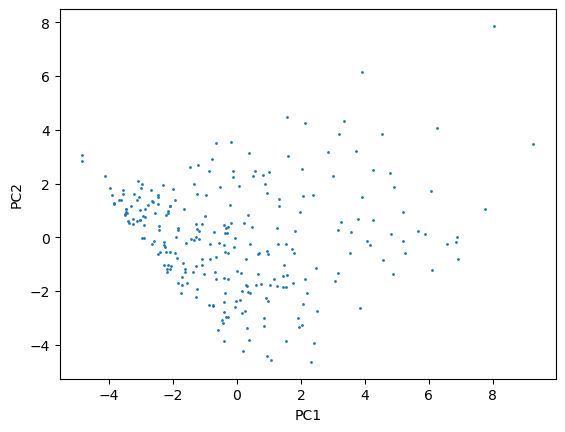

In [17]:
z = pca.transform(X)
plt.plot(z[:, 0], z[:, 1], 'o', ms=1)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
pca.components_

Text(0, 0.5, 'PC2')

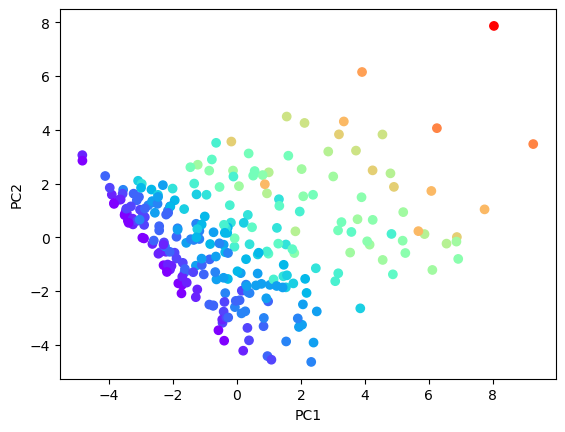

In [24]:
colors = cm.rainbow((df['Years'] - df['Years'].min()) / (df['Years'].max() - df['Years'].min()))

z = pca.transform(X)
plt.scatter(z[:, 0], z[:, 1], color=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')

(-2.0, 2.0)

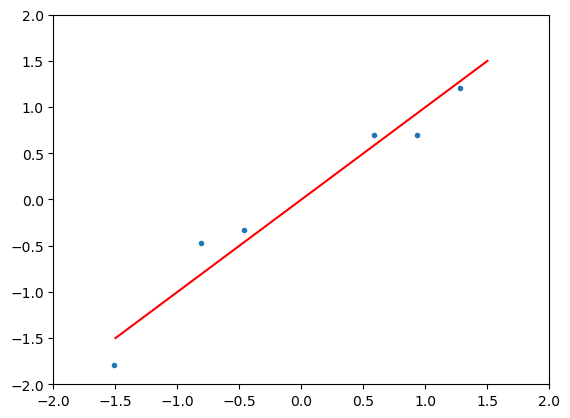

In [18]:
# Outliers can affect the principal components!
np.random.seed(121123)
x1 = np.array([0.1, 0.3, 0.4, 0.7, 0.8, 0.9])
x2 = 0.4 * x1 + np.random.normal(loc=0, scale=0.05, size=6) + 0.3
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)
plt.plot(x1, x2, 'o', ms=3)

x = np.vstack((x1, x2))

v = np.linalg.eig(np.cov(x)).eigenvectors
v1 = v[:, 0]
v2 = v[:, 1]

alpha1 = v1.reshape(2, 1) * np.dot(v1, np.array((-1.5, 1.5, -1.5, 1.5)).reshape(2, 2)).reshape(1, 2)
plt.plot(alpha1[0, :], alpha1[1, :], color='red')
plt.ylim([-2, 2])
plt.xlim([-2, 2])

(-2.0, 2.0)

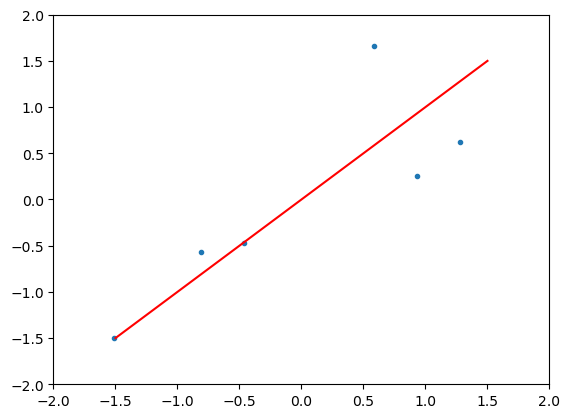

In [19]:
# Outliers can affect the principal components!
x2[3] = x2[3] + 2
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)
plt.plot(x1, x2, 'o', ms=3)

x = np.vstack((x1, x2))

v = np.linalg.eig(np.cov(x)).eigenvectors
v1 = v[:, 0]
v2 = v[:, 1]

alpha1 = v1.reshape(2, 1) * np.dot(v1, np.array((-1.5, 1.5, -1.5, 1.5)).reshape(2, 2)).reshape(1, 2)
plt.plot(alpha1[0, :], alpha1[1, :], color='red')
plt.ylim([-2, 2])
plt.xlim([-2, 2])